In [1]:
#imort Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
#import dataframe 
csv_path = 'combined data_1002.csv'
master_data = pd.read_csv(csv_path)
master_df = pd.DataFrame(master_data)
master_df.drop('Unnamed: 0',axis=1,inplace=True)
master_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'goal_diff', 'home_result', 'lat', 'lng', 'host_continent',
       'home_continent', 'away_continent', 'result', 'results', 'total_goals'],
      dtype='object')

In [3]:
master_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,goal_diff,home_result,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,...,0,Tie,NaN,NaN,Europe,Europe,Europe,NaN,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,...,2,win,NaN,NaN,Europe,Europe,Europe,NaN,England,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,...,1,win,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,...,0,Tie,NaN,NaN,Europe,Europe,Europe,NaN,Tie,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,...,3,win,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3


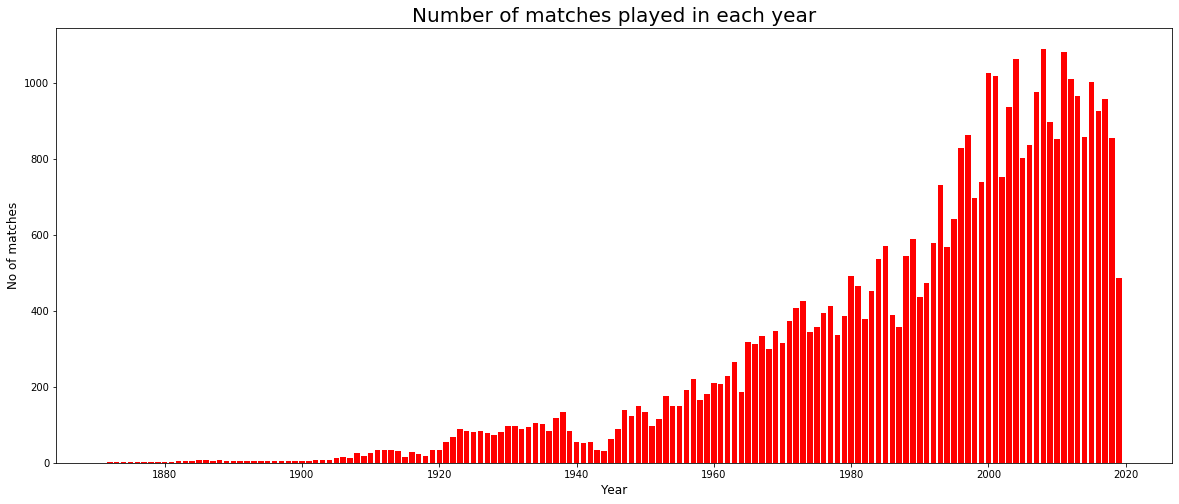

In [7]:
match_count = master_df['year'].value_counts()
match_count.head(2)
plt.figure(figsize=(20,8))
plt.bar(match_count.index, match_count.values, color='red')
plt.title('Number of matches played in each year', fontsize=20)
plt.ylabel('No of matches', fontsize=12)
plt.xlabel('Year', fontsize=12)

plt.savefig('fig1.png')
plt.show()

In [8]:
total_game_year=master_df.groupby(['year'])['total_goals'].count()
goal_count_year = master_df.groupby(['year'])['total_goals'].apply(sum)
goal_count_year
total_game_year
total_goal_game=pd.concat([total_game_year,goal_count_year],axis=1)
total_goal_game.columns=["total game","total_goal"]
total_goal_game['goal_per_game']=total_goal_game["total_goal"]/total_goal_game["total game"]
total_goal_game.tail(10)


,total game,total_goal,goal_per_game
year,,,
2010,854,2204,2.580796
2011,1081,2980,2.756707
2012,1012,2809,2.775692
2013,966,2529,2.618012
2014,859,2248,2.616997
2015,1003,2678,2.669990
2016,926,2531,2.733261
2017,958,2583,2.696242
2018,855,2154,2.519298


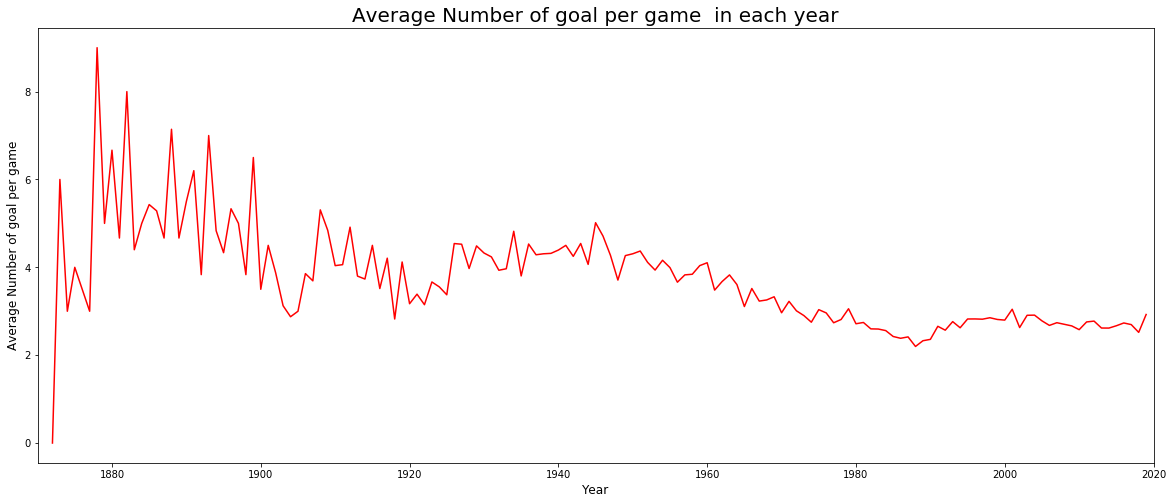

In [9]:
plt.figure(figsize=(20,8))
plt.plot(total_goal_game.index,total_goal_game['goal_per_game'], color='red')
plt.title('Average Number of goal per game  in each year', fontsize=20)
plt.ylabel('Average Number of goal per game', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xlim(1870,2020)
plt.savefig('fig2.png')
plt.show()

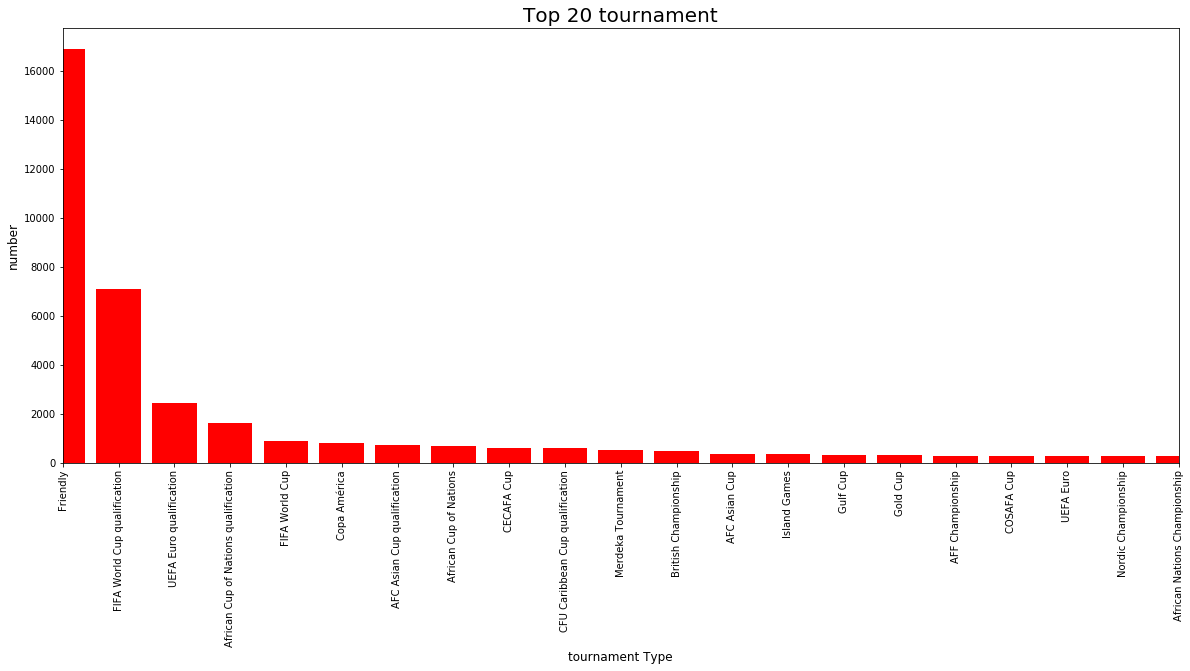

In [10]:
match_count = master_df['tournament'].value_counts()
plt.figure(figsize=(20,8))
plt.bar(match_count.index, match_count.values, color='red',label=match_count.index)
plt.title('Top 20 tournament', fontsize=20)
plt.ylabel('number', fontsize=12)
plt.xlabel('tournament Type', fontsize=12)
plt.xlim(0,20)
plt.xticks(rotation=90)
plt.savefig('fig3.png')
plt.show()

In [11]:
match_number=pd.DataFrame(match_count)
t_sum=match_number.sum()
match_number["percent"]=match_number["tournament"].apply(lambda x:x/t_sum)
match_number.head()


,tournament,percent
Friendly,16911,0.414089
FIFA World Cup qualification,7100,0.173853
UEFA Euro qualification,2432,0.059551
African Cup of Nations qualification,1616,0.039570
FIFA World Cup,900,0.022038


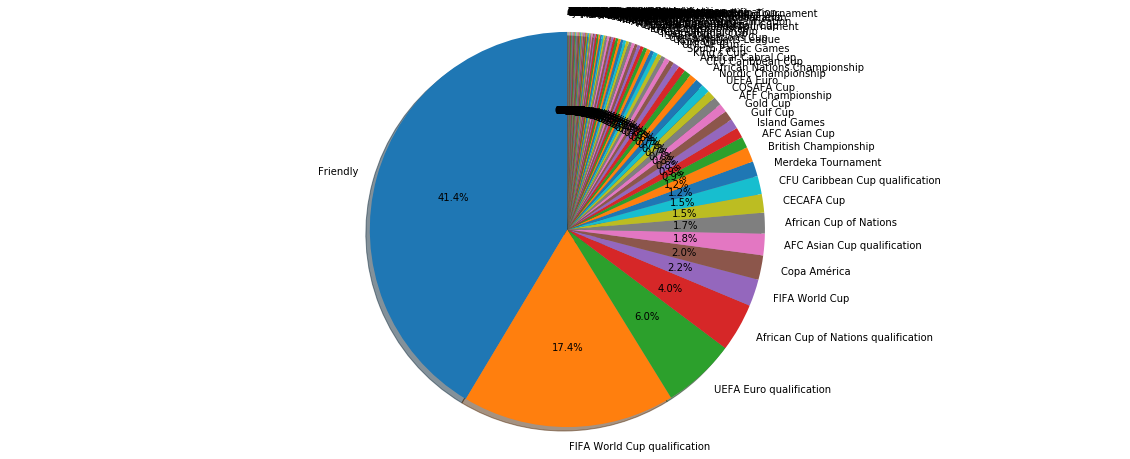

In [93]:

# Pie chart, 
labels =match_number.index

sizes=match_number["tournament"]

plt.figure(figsize=(20,8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('fig4.png')
plt.show()





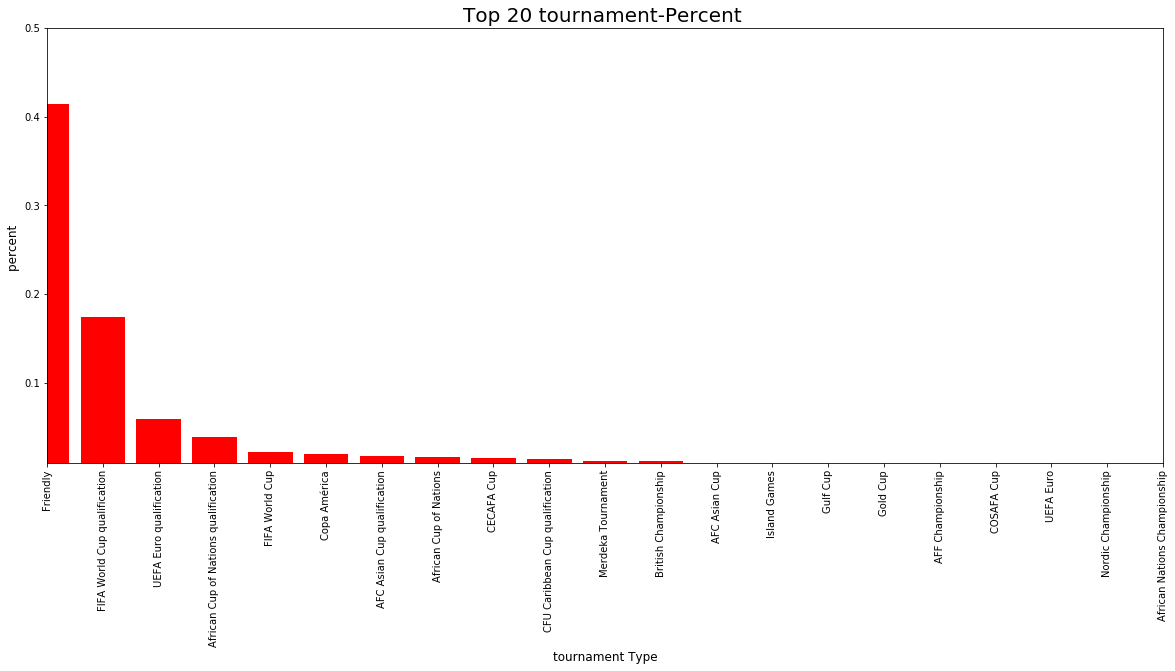

In [13]:
plt.figure(figsize=(20,8))

plt.bar(match_number.index, match_number["percent"], color='red',label=match_count.index)
plt.title('Top 20 tournament-Percent ', fontsize=20)
plt.ylabel('percent ', fontsize=12)
plt.xlabel('tournament Type', fontsize=12)
plt.xlim(0,20)
plt.ylim(.01,.5)
plt.xticks(rotation=90)

plt.savefig('fig5.png')
plt.show()

In [14]:
bins = [0,1950,1960,1970,1980,1990,2000,2010,2020]
labels = ['before 50',"50's","60's","70's","80's","90's","2000's","2010's"]
master_df['era'] = pd.cut(master_df['year'], bins=bins, labels=labels)
master_df.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,home_result,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals,era
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,2019,...,win,NaN,NaN,Oceania,Oceania,Oceania,NaN,American Samoa,9,2010's
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,2019,...,Tie,NaN,NaN,Oceania,Oceania,Oceania,NaN,Tie,8,2010's
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019,...,lose,NaN,NaN,Africa,Africa,Africa,NaN,Algeria,1,2010's
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,2019,...,lose,NaN,NaN,Asia,Asia,Asia,NaN,North Korea,1,2010's
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,2019,...,Tie,NaN,NaN,Oceania,Oceania,Oceania,NaN,Tie,2,2010's


In [15]:
era_tour_pd=pd.DataFrame(master_df.groupby(["era"])['tournament'].value_counts())

era_tour_pd.columns=["count_game"]
era_tour_pd.head(20)
#n=pd.DataFrame.pivot(era_tour_pd,index=['era'],columns=['tournament'],values=["count_game"])
n=pd.DataFrame.unstack(era_tour_pd,level=-2)
n.fillna(0)
n.head()


count_game                                 \
era                              before 50  50's  60's  70's  80's   90's   
tournament                                                                  
ABCS Tournament                        NaN   NaN   NaN   NaN   NaN    NaN   
AFC Asian Cup                          NaN  12.0  16.0  47.0  48.0   68.0   
AFC Asian Cup qualification            NaN  18.0  20.0  73.0  86.0  162.0   
AFC Challenge Cup                      NaN   NaN   NaN   NaN   NaN    NaN   
AFC Challenge Cup qualification        NaN   NaN   NaN   NaN   NaN    NaN   

                                               
era                             2000's 2010's  
tournament                                     
ABCS Tournament                    4.0   16.0  
AFC Asian Cup                     64.0  115.0  
AFC Asian Cup qualification      220.0  145.0  
AFC Challenge Cup                 55.0   45.0  
AFC Challenge Cup qualification   38.0   54.0

In [16]:
a=n.count(axis=0,numeric_only=True)
print(len(a))
a

8


            era      
count_game  before 50    19
            50's         24
            60's         36
            70's         45
            80's         41
            90's         53
            2000's       54
            2010's       55
dtype: int64

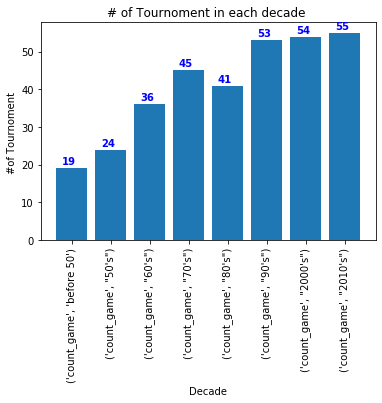

In [17]:
plt.xticks(ticks=range(8),labels=a.index,rotation=90)

plt.bar(range(8),a.values )
for i, v in enumerate(a.values):
    plt.text( i-.25 , v+1,v, color='blue', fontweight='bold')

plt.title('# of Tournoment in each decade ')  
plt.xlabel('Decade')
plt.ylabel('#of Tournoment ')
plt.savefig('fig6.png')
plt.show()

In [18]:
def home_wins(row):
        if  row['home_team'] == row['results']:
            return("Home")
        elif  row['results'] == 'Tie':
            return("Tie")
        else:
            return("Away")
        
            
master_df['home_win_adv'] = pd.DataFrame(master_df[['home_team','results','neutral']].apply(home_wins,axis=1))
master_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals,era,home_win_adv
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,...,NaN,NaN,Europe,Europe,Europe,NaN,Tie,0,before 50,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,...,NaN,NaN,Europe,Europe,Europe,NaN,England,6,before 50,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,...,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3,before 50,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,...,NaN,NaN,Europe,Europe,Europe,NaN,Tie,4,before 50,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,...,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3,before 50,Home


In [19]:
home_pref=pd.DataFrame.pivot_table(master_df,values=['date'],index=['neutral'],columns=['home_win_adv'],aggfunc='count')

home_pref


date             
home_win_adv  Away   Home   Tie
neutral                        
False         8086  15481  7113
True          3458   4383  2318

In [87]:
false_sum=sum(home_pref.iloc[0,:])
true_sum=sum(home_pref.iloc[1,:])
false_neutral=(home_pref.iloc[0,:])
true_neutral=(home_pref.iloc[1,:])
f1=false_neutral/false_sum
t1=true_neutral/true_sum
print (f1,t1)

      home_win_adv
date  Away            0.263559
      Home            0.504596
      Tie             0.231845
dtype: float64       home_win_adv
date  Away            0.340388
      Home            0.431440
      Tie             0.228172
Name: True, dtype: float64


In [20]:
home_pref.columns

MultiIndex(levels=[['date'], ['Away', 'Home', 'Tie']],
           codes=[[0, 0, 0], [0, 1, 2]],
           names=[None, 'home_win_adv'])

In [21]:
away_adv=np.array(home_pref.iloc[:,0])
home_adv=np.array(home_pref.iloc[:,1])
tie_adv=np.array(home_pref.iloc[:,2])
bars = np.add(home_adv,away_adv).tolist()
bars

[23567, 7841]

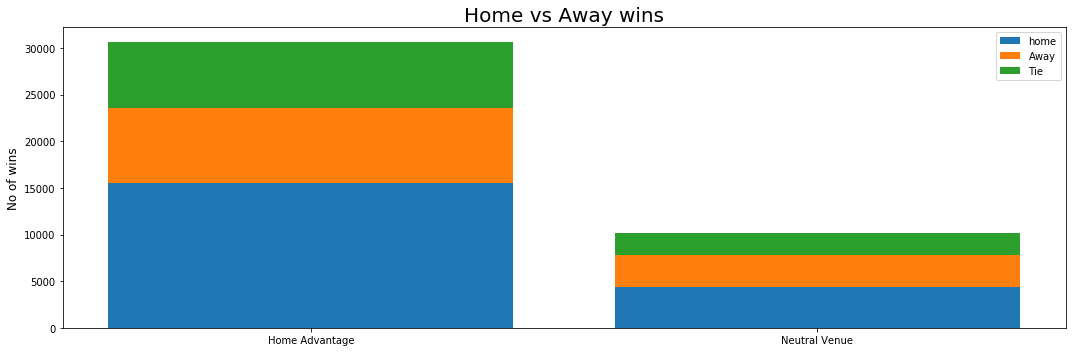

In [89]:
plt.figure(figsize=(15,5))
plt.xticks([0,1],["Home Advantage","Neutral Venue"])
p1=plt.bar([0,1],home_adv)
p2=plt.bar([0,1],away_adv,bottom=home_adv)   
p3=plt.bar([0,1],tie_adv,bottom=bars)

plt.title('Home vs Away wins', fontsize=20)
plt.ylabel('No of wins', fontsize=12)
#plt.xlabel('Home or Away', fontsize=12)

plt.legend((p1[0], p2[0],p3[0]), ('home', 'Away','Tie'))
#plt.table(cellText=f1,colLabels=home_pref.columns,loc='bottom')
plt.tight_layout()
plt.savefig('fig7.png')
plt.show()

In [91]:
print (f1,t1)

      home_win_adv
date  Away            0.263559
      Home            0.504596
      Tie             0.231845
dtype: float64       home_win_adv
date  Away            0.340388
      Home            0.431440
      Tie             0.228172
Name: True, dtype: float64


In [34]:
csv_path2 = 'Countries of the world-f.csv'
country_data = pd.read_csv(csv_path2)
country_df = pd.DataFrame(country_data)
country_com_df=country_df.loc[:,['Country','Region','Population','Area','Pop. Density','GDP','Literacy']]
#country_com_df.rename(columns={'Country':'countries'},inplace=True)
country_com_df.head()

,Country,Region,Population,Area,Pop. Density,GDP,Literacy
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,700.0,36.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,4500.0,86.5
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,6000.0,70.0
3,American Samoa,OCEANIA,57794,199,290.4,8000.0,97.0
4,Andorra,WESTERN EUROPE,71201,468,152.1,19000.0,100.0


In [35]:
fifa_cup_only=master_df.loc[master_df['tournament']=='FIFA World Cup']
fifa_cup_only.reset_index(drop=True,inplace=True)
fifa_cup_only.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals,era,home_win_adv
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,NaN,South America,Europe,NCAC,NaN,United States,3,before 50,Away
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,NaN,South America,Europe,NCAC,NaN,France,5,before 50,Home
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,NaN,South America,South America,Europe,NaN,Yugoslavia,3,before 50,Away
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,NaN,South America,South America,Europe,NaN,Romania,4,before 50,Away
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,NaN,South America,South America,Europe,NaN,Argentina,1,before 50,Home


In [36]:
def result(row):
      
    if row['home_score'] > row['away_score']:
        return row['away_team']
    elif row['home_score'] < row['away_score']:
        return row['home_team']
    else:
        return('Tie')
fifa_cup_only['who_loses'] = fifa_cup_only[['home_score','away_score','home_team','away_team']].apply(result,axis=1)
fifa_cup_only.head()

C:\Users\tobe\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,lng,host_continent,home_continent,away_continent,result,results,total_goals,era,home_win_adv,who_loses
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,Europe,NCAC,NaN,United States,3,before 50,Away,Belgium
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,Europe,NCAC,NaN,France,5,before 50,Home,Mexico
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,South America,Europe,NaN,Yugoslavia,3,before 50,Away,Brazil
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,South America,Europe,NaN,Romania,4,before 50,Away,Peru
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,South America,Europe,NaN,Argentina,1,before 50,Home,France


In [37]:
fifa_cup_only.rename(columns={'results':'who_wins'},inplace=True)
fifa_cup_only.head()

C:\Users\tobe\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,lng,host_continent,home_continent,away_continent,result,who_wins,total_goals,era,home_win_adv,who_loses
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,Europe,NCAC,NaN,United States,3,before 50,Away,Belgium
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,Europe,NCAC,NaN,France,5,before 50,Home,Mexico
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,South America,Europe,NaN,Yugoslavia,3,before 50,Away,Brazil
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,South America,Europe,NaN,Romania,4,before 50,Away,Peru
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,...,NaN,South America,South America,Europe,NaN,Argentina,1,before 50,Home,France


In [38]:
win_country=fifa_cup_only.groupby('who_wins')['home_team'].count()
lose_country=fifa_cup_only.groupby('who_loses')['home_team'].count()
total_goal_home_a=fifa_cup_only.groupby('home_team')['home_score'].sum()
total_goal_away_a=fifa_cup_only.groupby('away_team')['away_score'].sum()
total_goal_home_d=fifa_cup_only.groupby('home_team')['away_score'].sum()
total_goal_away_d=fifa_cup_only.groupby('away_team')['home_score'].sum()
total_game_home=fifa_cup_only.groupby('home_team')['home_team'].count()  
total_game_away=fifa_cup_only.groupby('away_team')['away_team'].count() 


In [39]:
tie_country_l=pd.DataFrame(fifa_cup_only.loc[fifa_cup_only['who_wins']=='Tie'])
tie_total_home=tie_country_l.groupby('home_team')['home_team'].count()
tie_total_away=tie_country_l.groupby('away_team')['away_team'].count()

In [40]:
tie_total=pd.concat([tie_total_home,tie_total_away],join='outer',axis=1,sort=True)
tie_total.fillna(0,inplace=True)
tie_total['total_tie']=tie_total['home_team']+tie_total['away_team']
tie_total.index.name='countries'
#tie_total

In [41]:
total_game_country=pd.concat([total_game_home,total_game_away],join='outer',axis=1,sort=True)
total_game_country.fillna(0,inplace=True)
total_game_country['total_game']=total_game_country['home_team']+total_game_country['away_team']
total_game_country.index.name='countries'
#total_game_country

In [42]:
total_attack=pd.concat([total_goal_home_a,total_goal_away_a],join='outer',axis=1,sort=True)
total_attack.fillna(0,inplace=True)
total_attack['total_attack']=total_attack['home_score']+total_attack['away_score']
total_attack.index.name='countries'
#total_attack

In [43]:
total_defence=pd.concat([total_goal_home_d,total_goal_away_d],join='outer',axis=1,sort=True)
total_defence.fillna(0,inplace=True)
total_defence['total_defence']=total_defence['home_score']+total_defence['away_score']
total_defence.index.name='countries'
#total_defence

In [44]:
total_win_lose=pd.concat([win_country,lose_country],join='outer',axis=1,sort=True)
total_win_lose.fillna(0,inplace=True)
total_win_lose.index.name='countries'
total_win_lose.columns=['total_win','total_lose']
#total_win_lose

In [92]:
d=pd.merge(total_game_country,total_win_lose,how='outer',on='countries')
e=pd.merge(d,tie_total,how='outer',on='countries')
f=pd.merge(e,total_attack,how='outer',on='countries')
g=pd.merge(f,total_defence,how='outer',on='countries')
g.fillna(0,inplace=True)
fifa_country_card=g.iloc[:,[2,3,4,7,10,13]]
fifa_country_card.reset_index(inplace=True)
fifa_country_card.head(10)

,countries,total_game,total_win,total_lose,total_tie,total_attack,total_defence
0,Algeria,13.0,3.0,7,3.0,13.0,19.0
1,Angola,3.0,0.0,1,2.0,1.0,2.0
2,Argentina,81.0,43.0,23,15.0,137.0,93.0
3,Australia,16.0,2.0,10,4.0,13.0,31.0
4,Austria,29.0,12.0,13,4.0,43.0,47.0
5,Belgium,48.0,20.0,19,9.0,68.0,72.0
6,Bolivia,6.0,0.0,5,1.0,1.0,20.0
7,Bosnia and Herzegovina,3.0,1.0,2,0.0,4.0,4.0
8,Brazil,109.0,73.0,18,18.0,229.0,105.0
9,Bulgaria,26.0,3.0,15,8.0,22.0,53.0


In [46]:
country_com_df['countries']=country_com_df['Country'].str.strip()
fifa_with_countryinfo=pd.merge(fifa_country_card,country_com_df,how='left',on='countries')
fifa_with_countryinfo.dropna(inplace=True)
fifa_with_countryinfo.head()

,countries,total_game,total_win,total_lose,total_tie,total_attack,total_defence,Country,Region,Population,Area,Pop. Density,GDP,Literacy
0,Algeria,13.0,3.0,7,3.0,13.0,19.0,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,6000.0,70.0
1,Angola,3.0,0.0,1,2.0,1.0,2.0,Angola,SUB-SAHARAN AFRICA,12127071.0,1246700.0,9.7,1900.0,42.0
2,Argentina,81.0,43.0,23,15.0,137.0,93.0,Argentina,LATIN AMER. & CARIB,39921833.0,2766890.0,14.4,11200.0,97.1
3,Australia,16.0,2.0,10,4.0,13.0,31.0,Australia,OCEANIA,20264082.0,7686850.0,2.6,29000.0,100.0
4,Austria,29.0,12.0,13,4.0,43.0,47.0,Austria,WESTERN EUROPE,8192880.0,83870.0,97.7,30000.0,98.0


In [47]:
y1=fifa_with_countryinfo['total_game']
x1=fifa_with_countryinfo['Population']
x2=fifa_with_countryinfo['Area']
x3=fifa_with_countryinfo['GDP']
x4=fifa_with_countryinfo['Literacy']

In [48]:
(slope1, intercept1, r1, p1, _) = linregress(x1, y1)
(slope2, intercept2, r2, p2, _) = linregress(x2, y1)
(slope3, intercept3, r3, p3, _) = linregress(x3, y1)
(slope4, intercept4, r4, p4, _) = linregress(x4, y1)
fit1 = slope1 * x1 + intercept1
fit2 = slope2 * x2 + intercept2
fit3 = slope3 * x3 + intercept3
fit4 = slope4 * x4 + intercept4

In [73]:
print(f'R={r1:1.2f}')

R=0.31


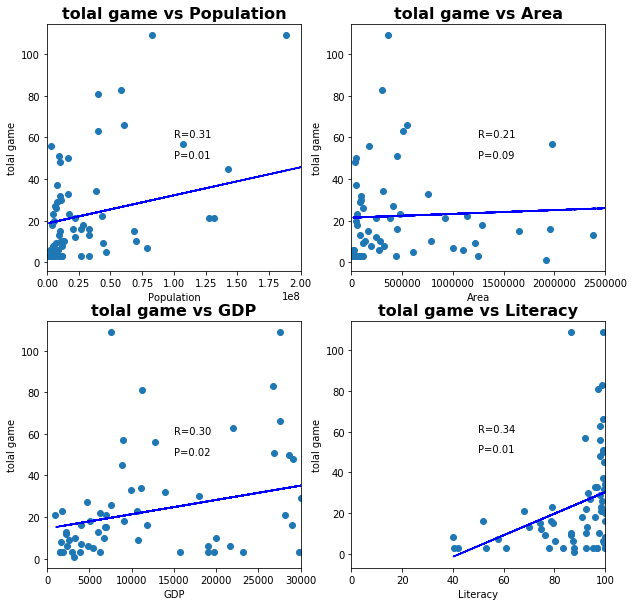

In [77]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.title("tolal game vs Population", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("tolal game")
plt.plot(x1,y1, linewidth=0, marker='o')
plt.plot(x1,fit1,'b--')
x1max=200000000
y1max=120
plt.xlim(0,x1max)
plt.text(x1max/2,y1max/2,f'R={r1:1.2f}')
plt.text(x1max/2,y1max/2-10,f'P={p1:1.2f}')

plt.subplot(222)
plt.title("tolal game vs Area", fontsize=16, fontweight="bold")
plt.xlabel("Area")
plt.ylabel("tolal game")
plt.plot(x2,y1, linewidth=0, marker='o')
plt.plot(x2,fit2,'b--')
x1max=2500000
y1max=120
plt.xlim(0,x1max)
plt.text(x1max/2,y1max/2,f'R={r2:1.2f}')
plt.text(x1max/2,y1max/2-10,f'P={p2:1.2f}')

plt.subplot(223)
plt.title("tolal game vs GDP", fontsize=16, fontweight="bold")
plt.xlabel("GDP")
plt.ylabel("tolal game")
plt.plot(x3,y1, linewidth=0, marker='o')
plt.plot(x3,fit3,'b--')
x1max=30000
y1max=120
plt.xlim(0,x1max)
plt.text(x1max/2,y1max/2,f'R={r3:1.2f}')
plt.text(x1max/2,y1max/2-10,f'P={p3:1.2f}')

plt.subplot(224)
plt.title("tolal game vs Literacy", fontsize=16, fontweight="bold")
plt.xlabel("Literacy")
plt.ylabel("tolal game")
plt.plot(x4,y1, linewidth=0, marker='o')
plt.plot(x4,fit4,'b--')
x1max=100
y1max=120
plt.xlim(0,x1max)
plt.text(x1max/2,y1max/2,f'R={r4:1.2f}')
plt.text(x1max/2,y1max/2-10,f'P={p4:1.2f}')


plt.savefig('fig8.png')
plt.show()